<a href="https://colab.research.google.com/github/Abimonalex/DS-LAB/blob/main/DS_LAB_14Neural_network_Mnist_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load and preprocess the MNIST data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2905 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1390 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1051 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0854 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0749 - accuracy: 0.9759


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy * 100:.2f}%')

313/313 - 1s - loss: 0.0747 - accuracy: 0.9766 - 664ms/epoch - 2ms/step

Test accuracy: 97.66%


In [ ]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


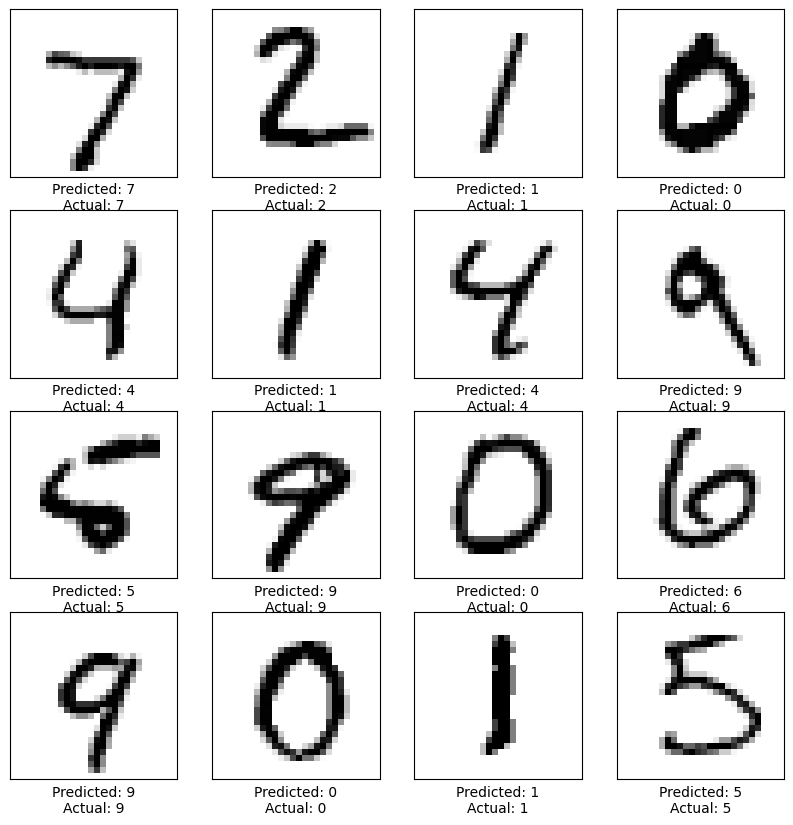

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
plt.show()